## CREANDO GRÁFICOS CON MATLPLOTLIB

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
# Lista de datos
x = np.linspace(-math.pi*4, 4*math.pi, 100)
y = []
for value in x :
    y.append( 10*math.sin(value) )


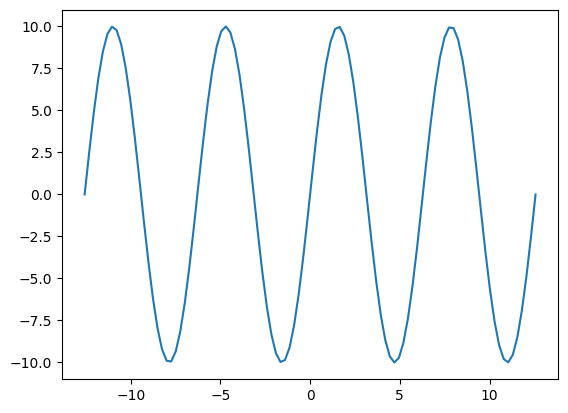

In [7]:
plt.plot(x, y)
plt.show()
# Guardar una imagen
# plt.savefig("cuadratica.jpg")
# plt.close()

### Cuantizando la señal generada
    1. Generar los bits de trabajo
    2. Crear el rango de valores para la asignación